In [51]:
%pip install scipy
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 660.6 kB/s eta 0:00:14
     - -------------------------------------- 0.3/9.2 MB 3.3 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/9.2 MB 5.5 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/9.2 MB 5.5 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/9.2 MB 5.5 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/9.2 MB 5.5 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/9.2 MB 5.5 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/9.2 MB 5.5 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/9.2 MB 5.5 MB/s eta 0:00:02
     --- ------------------------------------ 0.9/9.2 MB 2.0 MB/s eta 0:00:05
     ----- ---------------------------------- 1.3/9.2 MB 2.8 MB/s eta 0:00:03
   

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import statsmodels.api as sm

# P2C3 - Néttoyer votre jeu de données

## Erreur de type

In [3]:
data = pd.read_csv('datasets/operations.csv')
data

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE
...,...,...,...,...,...
304,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE
305,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE
306,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE
307,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT


In [4]:
data.dtypes

date_operation     object
libelle            object
montant           float64
solde_avt_ope     float64
categ              object
dtype: object

In [5]:
data['date_operation'] = pd.to_datetime(data['date_operation'])
data.dtypes

date_operation    datetime64[ns]
libelle                   object
montant                  float64
solde_avt_ope            float64
categ                     object
dtype: object

## Valeurs manquantes

In [6]:
data.isnull().sum()

date_operation    0
libelle           0
montant           2
solde_avt_ope     0
categ             1
dtype: int64

In [7]:
nb_na = data.isnull().sum()
nb_na[nb_na > 0]

montant    2
categ      1
dtype: int64

In [8]:
data.loc[data['montant'].isnull(), :]

,date_operation,libelle,montant,solde_avt_ope,categ
107,2023-06-12,CARTE XX XX LES ANCIENS ROBINSON XX,NaN,4667.19,COURSES
269,2023-09-11,CARTE XX XX XX XX,NaN,3401.93,AUTRE


In [9]:
# Les montant manquants correspondent au solde de l'opération suivante, moins le solde de l'opération concernée.
data_na = data.loc[data['montant'].isnull(), :]
for index in data_na.index:
    data.loc[index, 'montant'] = data.loc[index + 1, 'solde_avt_ope'] - data.loc[index, 'solde_avt_ope']
data.loc[data['montant'].isnull(), :]

,date_operation,libelle,montant,solde_avt_ope,categ


In [10]:
data.loc[data['date_operation'] == '2023-06-12', :]

,date_operation,libelle,montant,solde_avt_ope,categ
103,2023-06-12,CARTE XX XX TOUPTIPRI XX,-2.51,4682.53,COURSES
104,2023-06-12,CARTE XX XX LES ANCIENS ROBINSON XX,-4.63,4680.02,COURSES
105,2023-06-12,CARTE XX XX TOUPTIPRI XX,-5.88,4675.39,COURSES
106,2023-06-12,CARTE XX XX XX XX XX XX,-2.32,4669.51,AUTRE
107,2023-06-12,CARTE XX XX LES ANCIENS ROBINSON XX,-26.58,4667.19,COURSES
108,2023-06-12,CARTE XX XX CHEZ LUC XX,-9.20,4640.61,RESTAURANT


In [11]:
data.loc[data['categ'].isnull(),:]

,date_operation,libelle,montant,solde_avt_ope,categ
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN


In [12]:
data.loc[data['libelle'] == 'PRELEVEMENT XX TELEPHONE XX XX', :]

,date_operation,libelle,montant,solde_avt_ope,categ
8,2023-04-05,PRELEVEMENT XX TELEPHONE XX XX,-7.02,2056.02,FACTURE TELEPHONE
62,2023-05-09,PRELEVEMENT XX TELEPHONE XX XX,-7.02,4090.10,FACTURE TELEPHONE
102,2023-06-07,PRELEVEMENT XX TELEPHONE XX XX,-6.38,4688.91,FACTURE TELEPHONE
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN
204,2023-08-07,PRELEVEMENT XX TELEPHONE XX XX,-7.46,3751.73,FACTURE TELEPHONE
260,2023-09-05,PRELEVEMENT XX TELEPHONE XX XX,-6.38,3453.96,FACTURE TELEPHONE
308,2023-10-06,PRELEVEMENT XX TELEPHONE XX XX,-13.58,2413.58,FACTURE TELEPHONE


In [13]:
data.loc[data['categ'].isnull(), 'categ'] = 'FACTURE TELEPHONE'
data.loc[data['categ'].isnull(),:]

,date_operation,libelle,montant,solde_avt_ope,categ


## Doublons

In [14]:
data.loc[data[['date_operation', 'libelle', 'montant', 'solde_avt_ope']].duplicated(keep=False),:]

,date_operation,libelle,montant,solde_avt_ope,categ
43,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES
44,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES


In [15]:
data.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'], inplace=True, ignore_index=True)

In [16]:
data.loc[data[['date_operation', 'libelle', 'montant', 'solde_avt_ope']].duplicated(keep=False),:]

,date_operation,libelle,montant,solde_avt_ope,categ


## Outliers

In [17]:
data.describe()

,date_operation,montant,solde_avt_ope
count,308,308.000000,308.000000
mean,2023-07-05 10:59:13.246753280,-45.782013,3395.301071
min,2023-03-31 00:00:00,-15000.000000,1416.810000
25%,2023-05-21 06:00:00,-20.447500,3010.737500
50%,2023-07-05 12:00:00,-9.600000,3452.465000
75%,2023-08-21 00:00:00,-2.715000,3787.232500
max,2023-10-06 00:00:00,1071.600000,4709.310000
std,NaN,872.818105,667.109412


In [18]:
i = data.loc[data['montant']==-15000,:].index[0]
data.iloc[i-1:i+2,:]

,date_operation,libelle,montant,solde_avt_ope,categ
197,2023-08-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,3121.35,AUTRE
198,2023-08-03,CARTE XX XX XX XX,-15000.00,3797.35,AUTRE
199,2023-08-03,CARTE XX XX L'EPICERIE DEMBAS XX XX,-10.51,3782.96,AUTRE


In [19]:
data.loc[data['montant']==-15000, 'montant'] = -14.39
data.describe()

,date_operation,montant,solde_avt_ope
count,308,308.000000,308.000000
mean,2023-07-05 10:59:13.246753280,2.872565,3395.301071
min,2023-03-31 00:00:00,-602.270000,1416.810000
25%,2023-05-21 06:00:00,-20.047500,3010.737500
50%,2023-07-05 12:00:00,-9.600000,3452.465000
75%,2023-08-21 00:00:00,-2.715000,3787.232500
max,2023-10-06 00:00:00,1071.600000,4709.310000
std,NaN,176.089858,667.109412


# P3C1 - Représentez la distribution empirique d'une variable

## Variables qualitatives

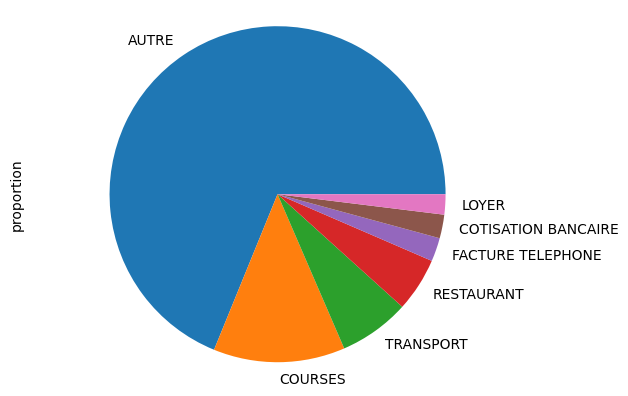

In [20]:
# Pie chart
data['categ'].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal')
plt.show()

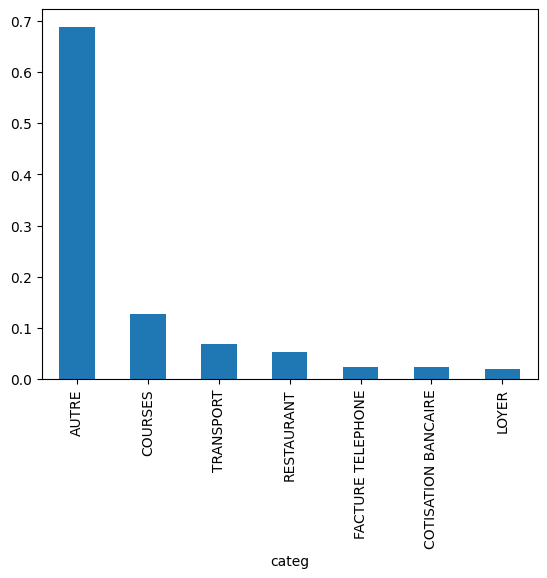

In [21]:
# bar chart
data['categ'].value_counts(normalize=True).plot(kind='bar')
plt.show()

## Variables quantitatives

### Discrétes

In [22]:
data['quart_mois'] = [int((jour - 1) * 4 / 31) + 1 for jour in data['date_operation'].dt.day]

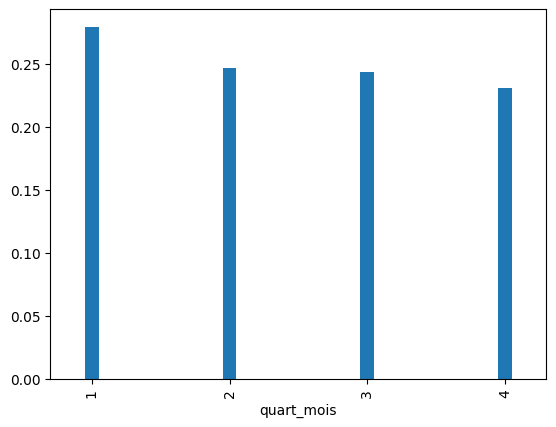

In [23]:
data['quart_mois'].value_counts(normalize=True).plot(kind='bar', width=0.1)
plt.show()

### Continues

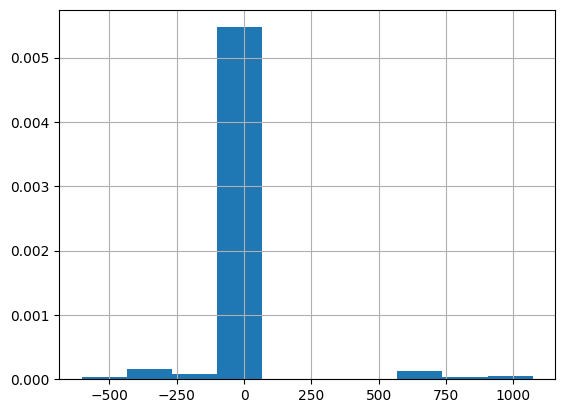

In [24]:
# Histogramme
data['montant'].hist(density=True)
plt.show()

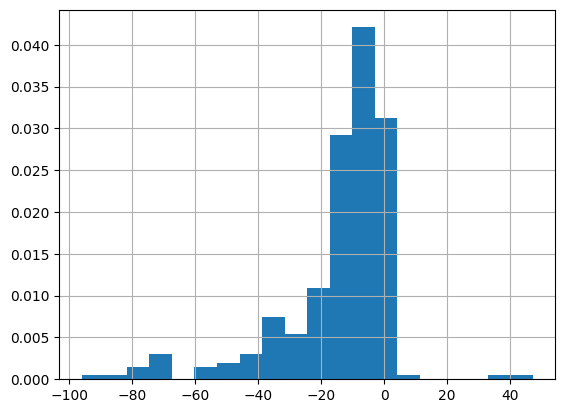

In [25]:
data[data.montant.abs() < 100]['montant'].hist(density=True, bins=20)
plt.show()

# P3C2 - Présentez une variable sous forme de tableau

## Variable quantitative discréte

In [26]:
effectifs = data['quart_mois'].value_counts()
modalites = effectifs.index

tab = pd.DataFrame(modalites, columns=['quart_mois'])
tab['n'] = effectifs.values
tab['f'] = tab['n'] / len(data)

tab = tab.sort_values('quart_mois')
tab['F'] = tab['f'].cumsum()
tab

,quart_mois,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000


# P3C4 - Découvrez les mesures de tendance centrale

In [27]:
data['montant'].mode()

0   -1.6
Name: montant, dtype: float64

In [28]:
data['montant'].mean()

2.8725649350649354

In [29]:
data['montant'].median()

-9.6

--------------------
AUTRE
moy:
 23.433207547169808
med:
 -8.31
mod:
 0   -1.6
Name: montant, dtype: float64


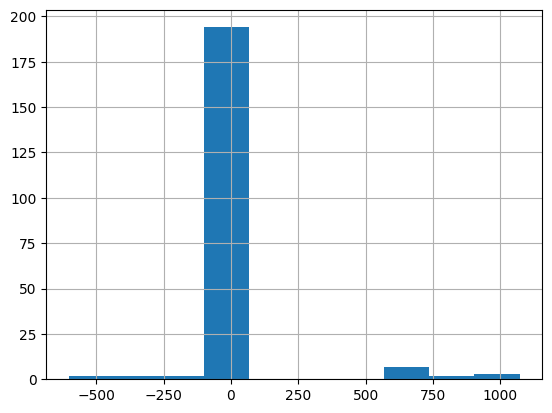

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
Name: montant, dtype: float64


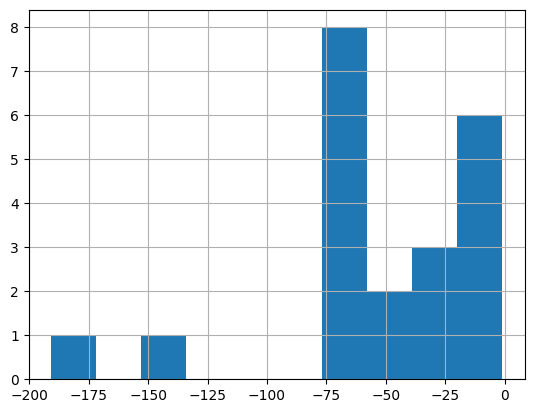

--------------------
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
Name: montant, dtype: float64


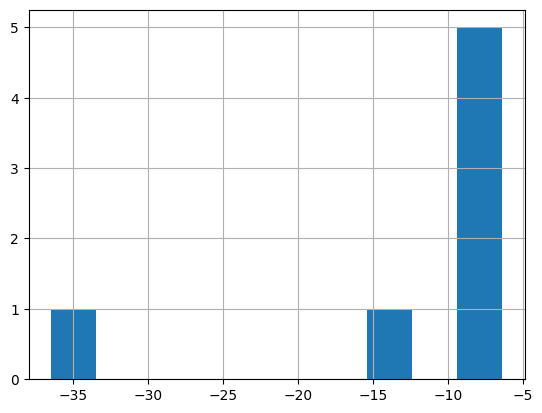

--------------------
COURSES
moy:
 -16.34128205128205
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64


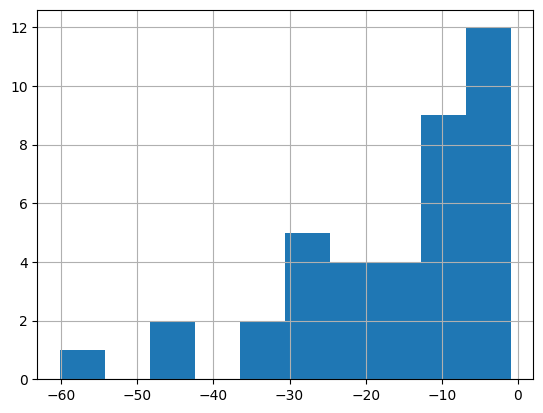

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
Name: montant, dtype: float64


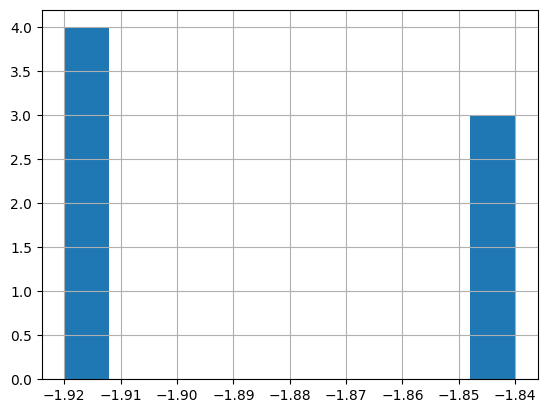

--------------------
RESTAURANT
moy:
 -10.3325
med:
 -10.1
mod:
 0   -9.2
Name: montant, dtype: float64


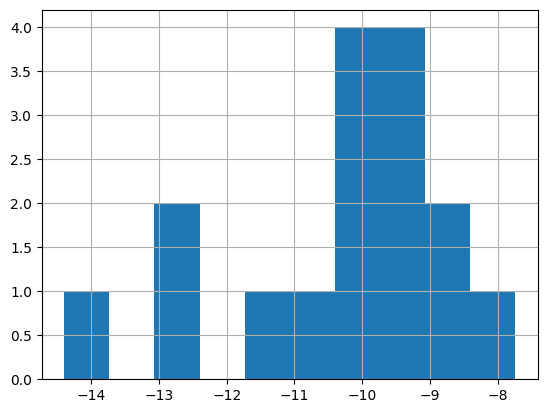

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
Name: montant, dtype: float64


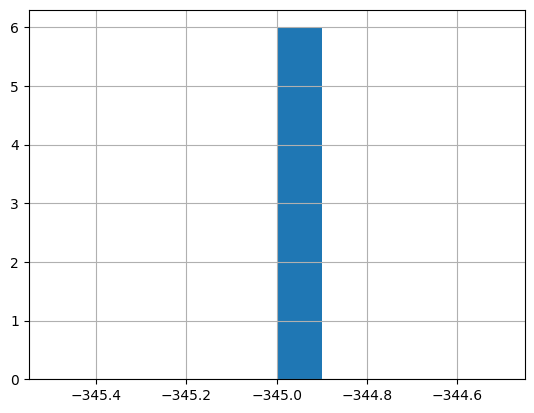

In [30]:
for cat in data['categ'].unique():
    subset = data.loc[data['categ'] == cat, :]
    print('-'*20)
    print(cat)
    print("moy:\n", subset['montant'].mean())
    print("med:\n", subset['montant'].median())
    print("mod:\n", subset['montant'].mode())
    subset['montant'].hist()
    plt.show()

# P3C5 - Comprenez les mesures de dispersion

## Variance empirique

![Alt text](image.png)

In [31]:
# variance empirique
data['montant'].var()

31007.638040630954

## Variance empirique corrigée

![Alt text](images/image-1.png)

In [32]:
# variance empirique corrigée
data['montant'].var(ddof=0)

30906.963891148385

## Écart-type empirique

![Alt text](images/image-2.png)

In [33]:
# écart-type empirique
data['montant'].std()

176.08985785851198

## Coefficient de variation

![Alt text](images/image-3.png)

In [34]:
# coefficient de variation
data['montant'].std() / data['montant'].mean()

61.30056651079026

## Écart interquartile

Il existe 3 quartiles, notés Q1 (premier quartile), Q2 (deuxième quartile) et Q3 (troisième quartile). Ainsi :
- 1/4 des valeurs se trouvent en dessous de Q1 et 3/4 au-dessus ;
- 2/4 se trouvent en dessous de Q2, et 2/4 au-dessus (Q2 est la médiane !) ;
- 3/4 se trouvent en dessous de Q3, et 1/4 au-dessus.

La généralisation de ce concept s'appelle le quantile d'ordre α. Ainsi, la médiane est le quantile d'ordre 0,5, Q1 le quantile d'ordre 0,25, Q3 le quantile d'ordre 0,75. Il y a également les déciles (quantiles d'ordre 0.1, 0.2, etc.), ou les centiles, aussi appelés percentiles (quantiles d'ordre 0,01, 0.02, etc.).

![Alt text](images/image-4.png)

## Boîte à moustache (boxplot)

Elle permet de représenter schématiquement une distribution, en incluant sa dispersion. La boîte est délimitée par Q1 et Q3, et on représente souvent la médiane à l’intérieur de la boîte.<br>
On dessine ensuite des moustaches à cette boîte, qui vont de la valeur minimale à la valeur maximale à condition que la moustache (d'un côté ou de l'autre) ne mesure pas plus de 1,5 fois l'écart inter-quartiles.<br>
Si certaines valeurs sont au-dessous de "Q1 − 1.5IQ" ou au-dessus de "Q3 + 1.5IQ", alors on les considère comme des outliers, et on ne les inclut pas dans la moustache.

![Alt text](images/image-5.png)

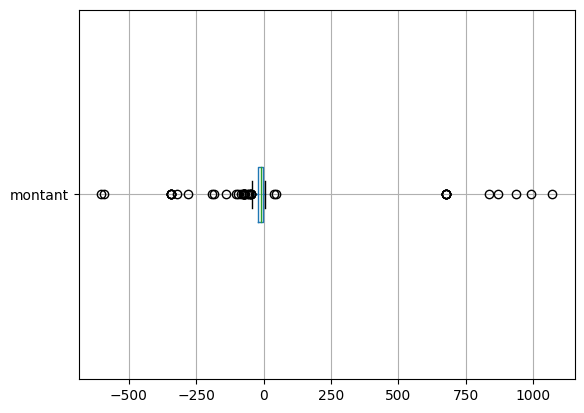

In [35]:
data.boxplot(column="montant", vert=False)
plt.show()

## Écart moyen absolu

deux versions : l'une où on mesure les écarts à la moyenne, l'autre où on mesure les écarts à la médiane.

![Alt text](images/image-6.png)

## Application

--------------------
AUTRE
moy:
 23.433207547169808
med:
 -8.31
mod:
 0   -1.6
Name: montant, dtype: float64
var:
 40401.82999254183
ect:
 201.00206464746034


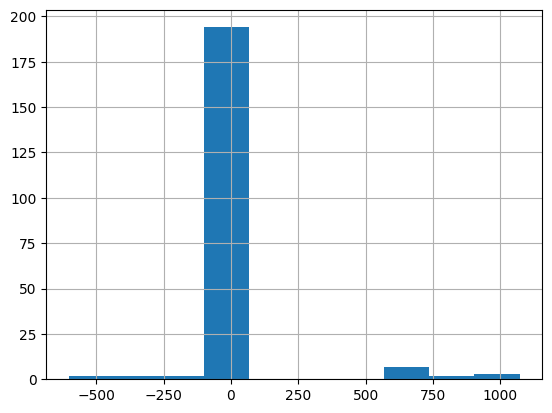

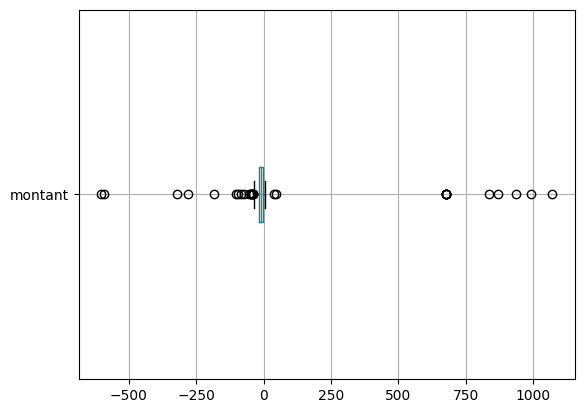

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
Name: montant, dtype: float64
var:
 2205.0168680272113
ect:
 46.95760713694014


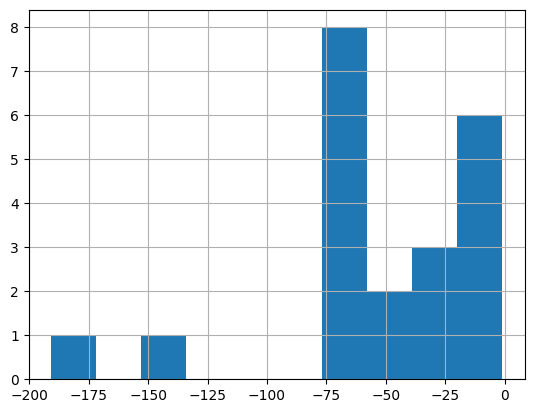

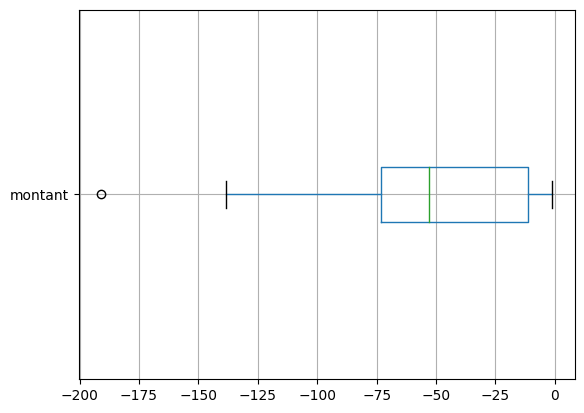

--------------------
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
Name: montant, dtype: float64
var:
 105.01905306122445
ect:
 10.247880417980317


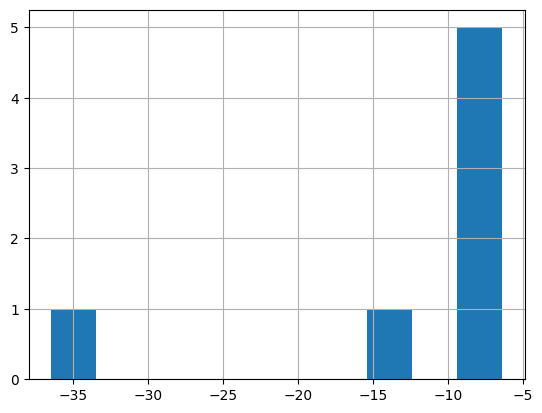

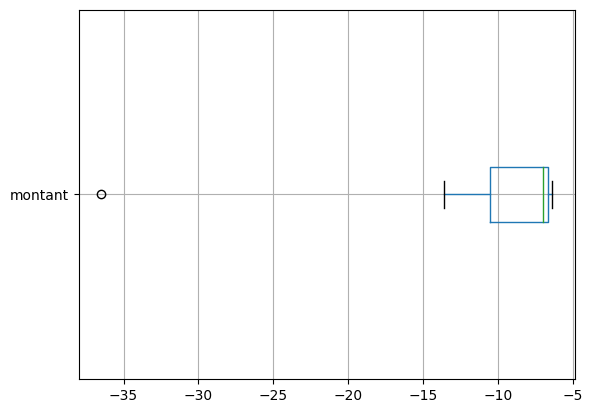

--------------------
COURSES
moy:
 -16.34128205128205
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64
var:
 177.02535476660088
ect:
 13.3050875520081


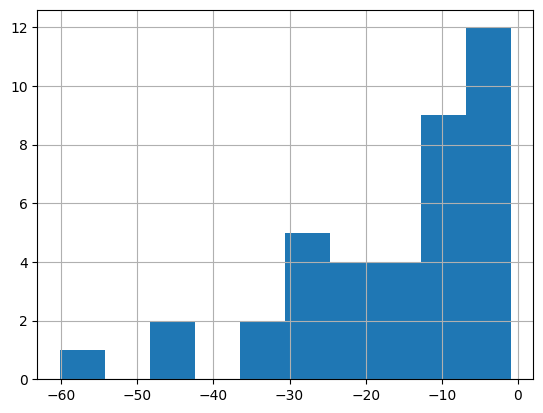

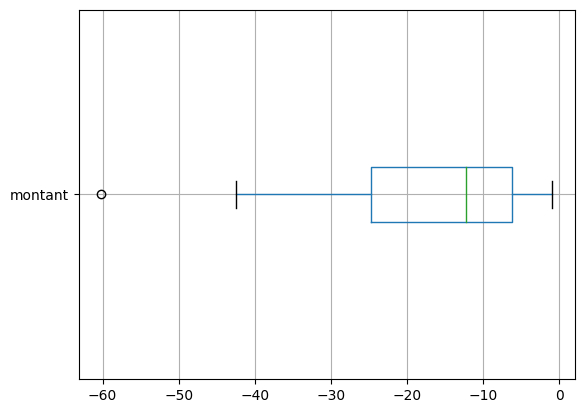

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
Name: montant, dtype: float64
var:
 0.0015673469387755044
ect:
 0.03958973274443141


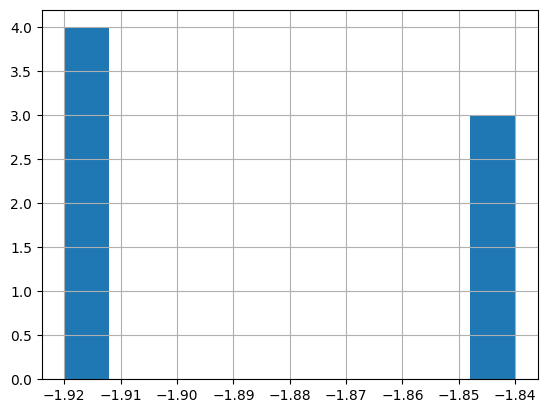

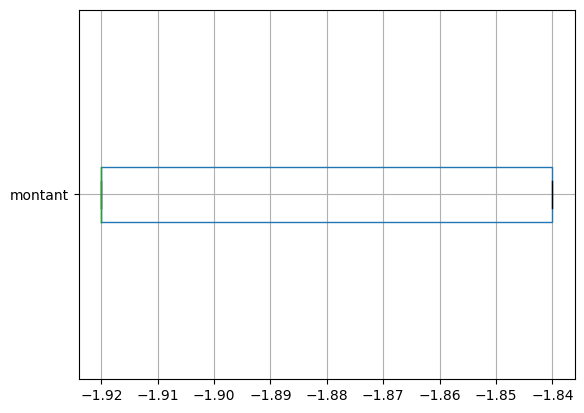

--------------------
RESTAURANT
moy:
 -10.3325
med:
 -10.1
mod:
 0   -9.2
Name: montant, dtype: float64
var:
 2.8531937500000004
ect:
 1.689139943876765


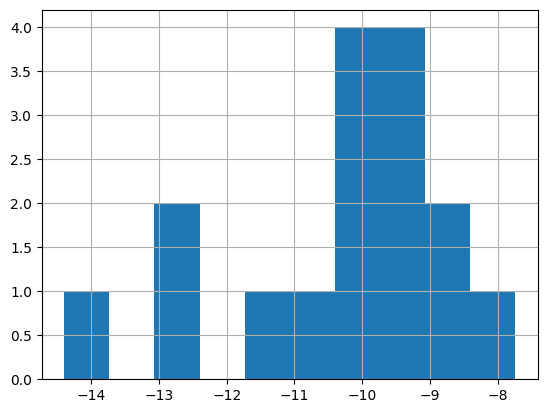

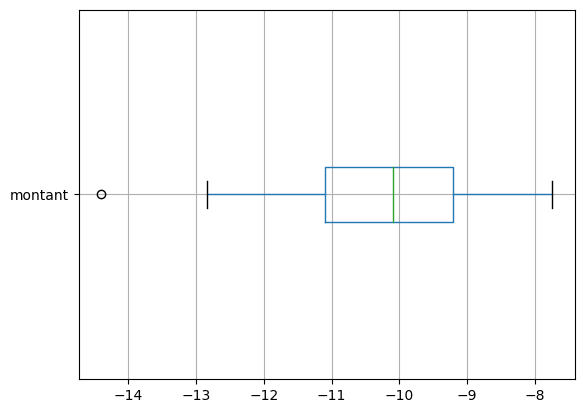

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
Name: montant, dtype: float64
var:
 0.0
ect:
 0.0


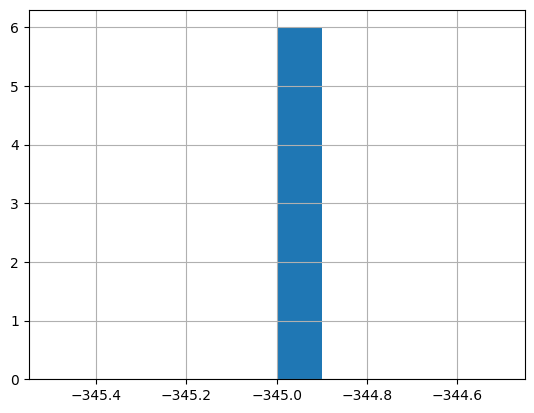

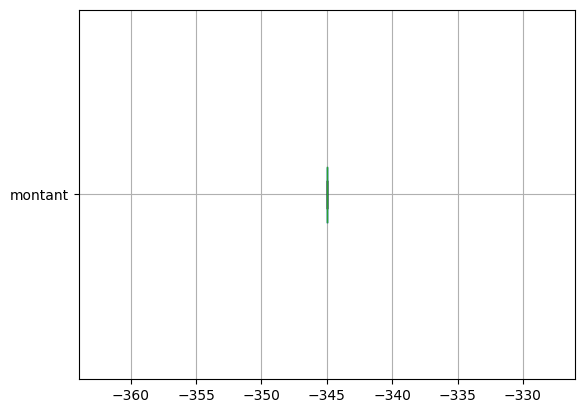

In [36]:
for cat in data['categ'].unique():
    subset = data.loc[data['categ'] == cat, :]
    print('-'*20)
    print(cat)
    print("moy:\n", subset['montant'].mean())
    print("med:\n", subset['montant'].median())
    print("mod:\n", subset['montant'].mode())
    print("var:\n",subset['montant'].var(ddof=0))
    print("ect:\n",subset['montant'].std(ddof=0))
    subset['montant'].hist()
    plt.show()
    subset.boxplot(column="montant", vert=False)
    plt.show()

# P3C6 - Appréhendez les mesures de forme

## Le Skewness empirique

![Alt text](images/image-7.png)

Le skewness est une mesure d'asymétrie.<br>
L’asymétrie d’une distribution traduit la régularité (ou non) avec laquelle les observations se répartissent autour de la valeur centrale. On interprète cette mesure de cette manière :
- Si γ1=0, alors la distribution est symétrique;
- Si γ1>0, alors la distribution est étalée à droite;
- Si γ1<0, alors la distribution est étalée à gauche.

![Alt text](images/image-8.png)

L'étude de l'asymétrie d'une distribution, c'est chercher qui de la médiane ou de la moyenne est la plus grande. Une distribution est dite symétrique si elle présente la même forme de part et d’autre du centre de la distribution. Dans ce cas : Mode=Med=Moy.<br>
Une distribution est étalée à droite (ou oblique à gauche, ou présentant une asymétrie positive) si : Mode<Med<Moy. De même, elle est étalée à gauche (ou oblique à droite) si Mode>Med>Moy
 .

In [37]:
data['montant'].skew()

3.3618450105098843

## Le Kurtosis empirique

![Alt text](images/image-9.png)

μ3 et μ4 dans les formules du skewness et du kurtosis sont appellé des moments.

Le kurtosis empirique est une mesure d'aplatissement.<br>
L’aplatissement peut s’interpréter à la condition que la distribution soit symétrique. En fait, on compare l'aplatissement par rapport à la distribution la plus célèbre, appelée distribution normale (parfois "courbe de Gauss" ou "Gaussienne").

Il s’interprète comme ceci :
- Si γ2=0, alors la distribution a le même aplatissement que la distribution normale;
- Si γ2>0, alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées;
- Si γ2<0, alors les observations sont moins concentrées : la distribution est plus aplatie.

![Alt text](images/image-10.png)

In [38]:
data['montant'].kurtosis()

17.2719048282677

## Application

--------------------
AUTRE
moy:
 23.433207547169808
med:
 -8.31
mod:
 0   -1.6
Name: montant, dtype: float64
var:
 40401.82999254183
ect:
 201.00206464746034
skw:
 3.1215325222336423
kur:
 12.716537970826295


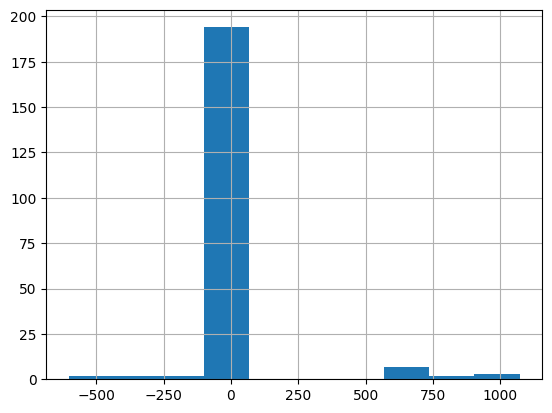

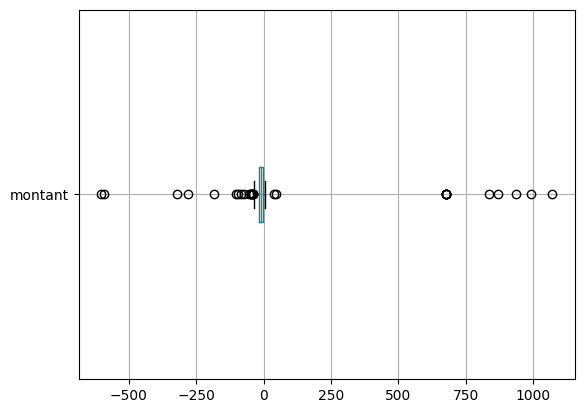

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
Name: montant, dtype: float64
var:
 2205.0168680272113
ect:
 46.95760713694014
skw:
 -1.248265076217821
kur:
 2.1922705326917495


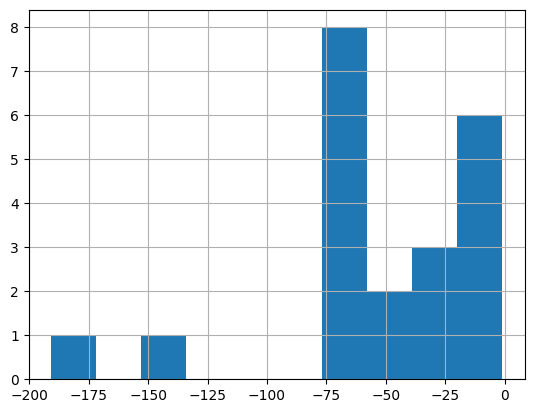

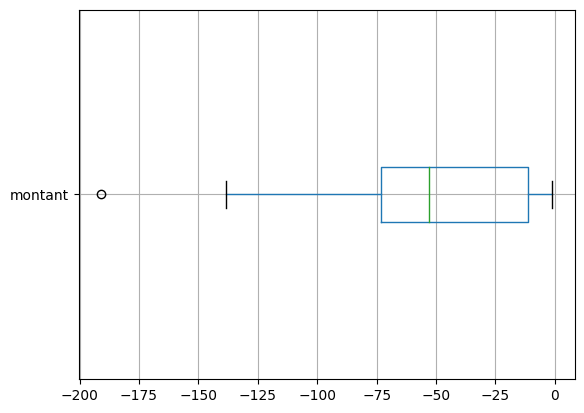

--------------------
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
Name: montant, dtype: float64
var:
 105.01905306122445
ect:
 10.247880417980317
skw:
 -2.3876514564281526
kur:
 5.798563367885492


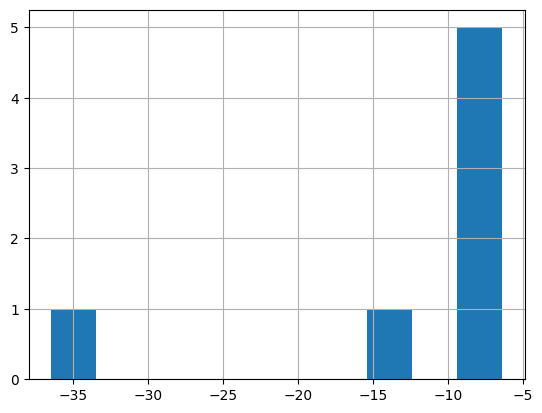

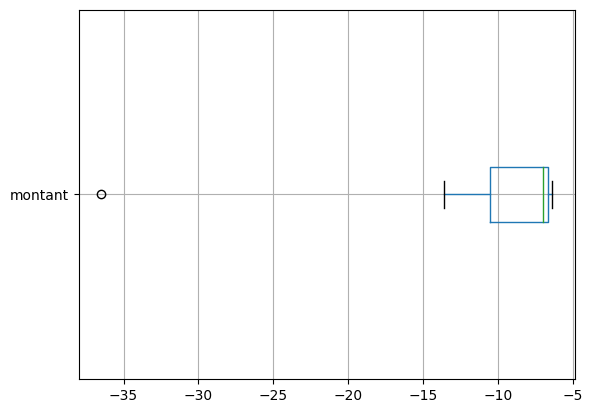

--------------------
COURSES
moy:
 -16.34128205128205
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64
var:
 177.02535476660088
ect:
 13.3050875520081
skw:
 -1.2467488306456982
kur:
 1.6047304940874998


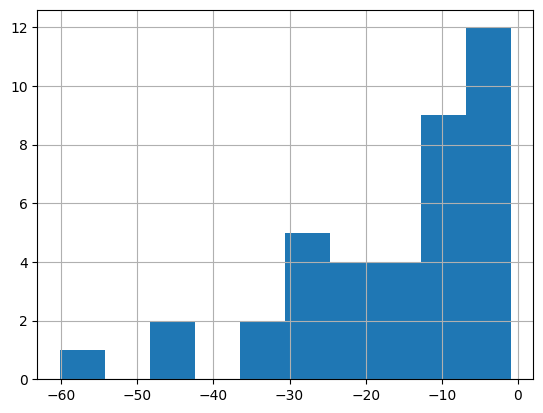

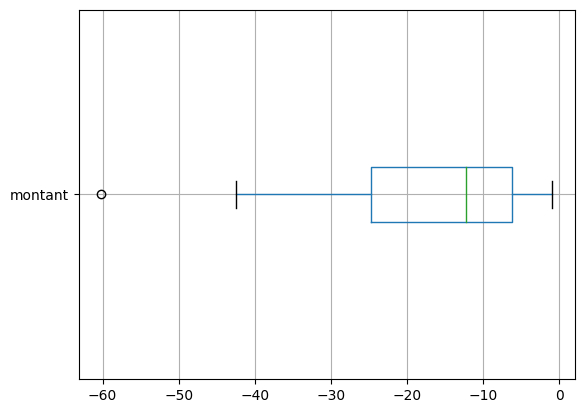

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
Name: montant, dtype: float64
var:
 0.0015673469387755044
ect:
 0.03958973274443141
skw:
 0.37416573867739106
kur:
 -2.800000000000003


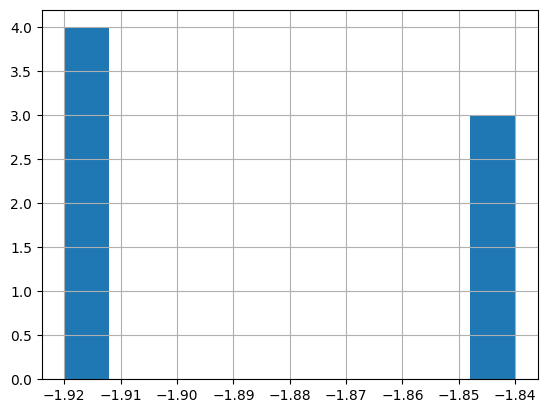

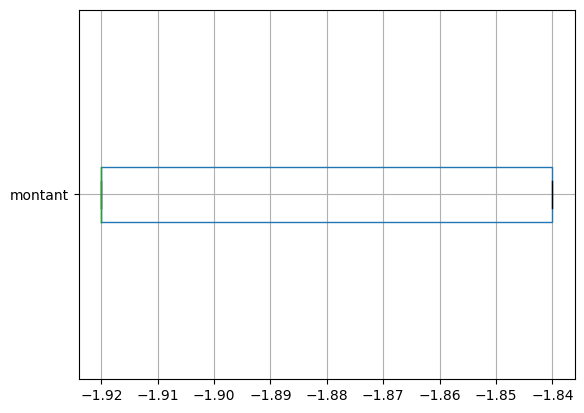

--------------------
RESTAURANT
moy:
 -10.3325
med:
 -10.1
mod:
 0   -9.2
Name: montant, dtype: float64
var:
 2.8531937500000004
ect:
 1.689139943876765
skw:
 -0.8883503487158837
kur:
 0.5988855591691937


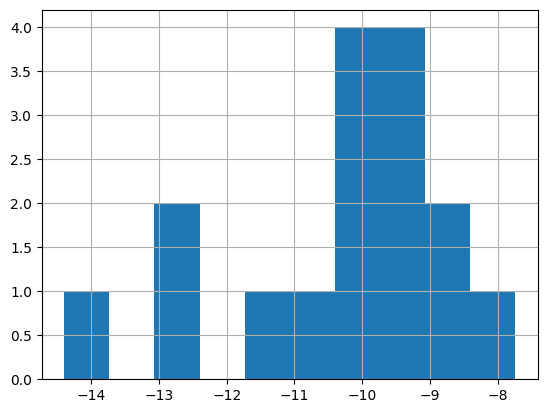

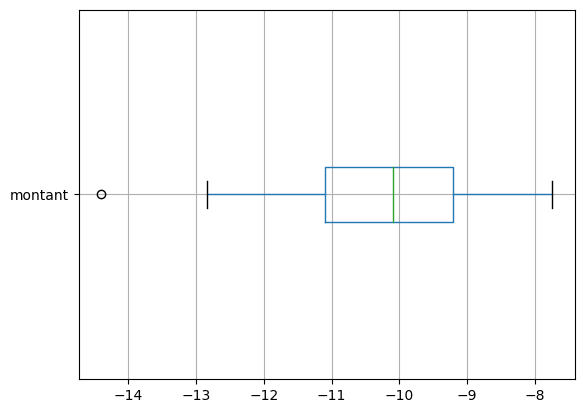

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
Name: montant, dtype: float64
var:
 0.0
ect:
 0.0
skw:
 0
kur:
 0


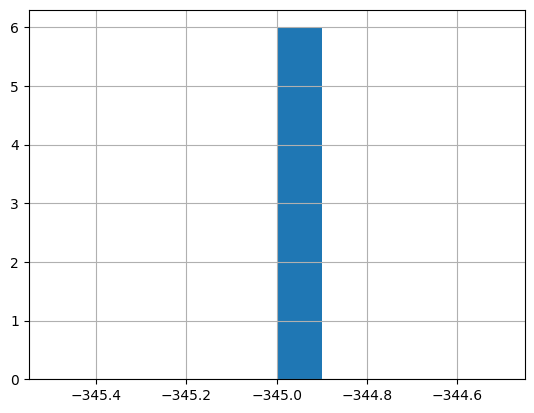

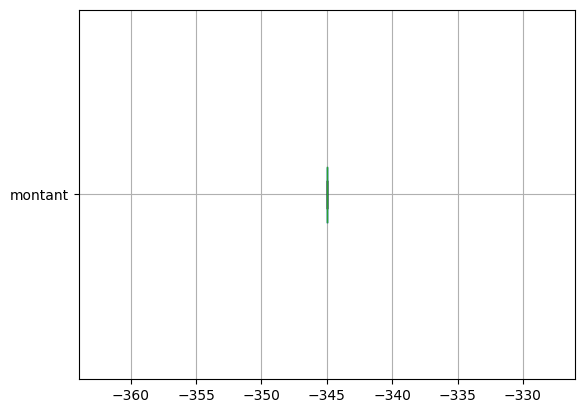

In [39]:
for cat in data["categ"].unique():
    subset = data[data.categ == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",subset['montant'].mean())
    print("med:\n",subset['montant'].median())
    print("mod:\n",subset['montant'].mode())
    print("var:\n",subset['montant'].var(ddof=0))
    print("ect:\n",subset['montant'].std(ddof=0))
    print("skw:\n",subset['montant'].skew())
    print("kur:\n",subset['montant'].kurtosis())
    subset["montant"].hist()
    plt.show()
    subset.boxplot(column="montant", vert=False)
    plt.show()

# P3C7 - Familiarisez-vous avec les mesures de concentration

## Courbe de Lorenz

Pour illustrer la courbe de Lorenz, imaginons la population d'un pays. Concentrons-nous sur les personnes qui ont des revenus.

Il faut vous imaginer la courbe de Lorenz comme un podium avec autant de places que de gens. Ce podium ressemble à un escalier, sur lequel on place l'individu qui gagne le plus d'argent tout en haut, et celui qui gagne le moins d'argent tout en bas.

Seulement, cet escalier n'est pas régulier : la hauteur d'une marche donnée, par rapport à la marche précédente, correspond au revenu de l'individu placé sur cette marche. Ainsi, quelqu'un qui gagne beaucoup d'argent sera placé sur une marche très haute par rapport à celle de la personne en dessous de lui.

La courbe de Lorenz représente cet escalier, la hauteur et la longueur sont ramenées à 1.

![Alt text](images/image-11.png)

Dans le cas où la répartition est la plus égalitaire possible, les marches sont réguliéres et toutes les personnes sont alignées sur une droite appellée "première bissectrice (passe par les point (0,0) et (1,1)).

![Alt text](images/image-12.png)

Dans le cas extrême inverse ou la répartition est la plus inégalitaire possible, la courbe de Lorenz ne suit plus la première bissectrice mais s'en éloigne au maximum.

![Alt text](images/image-13.png)

Donc plus la courbe de Lorenz est proche de la première bissectrice, plus la répartition est égalitaire.

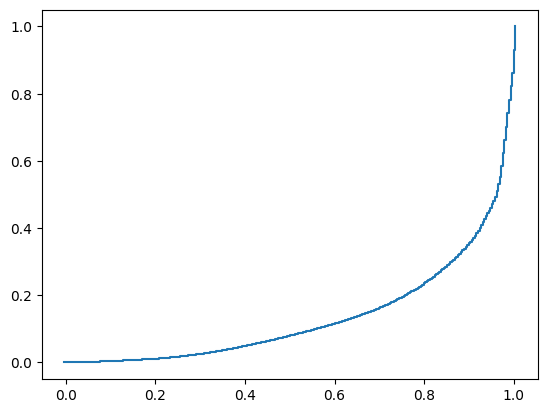

In [40]:
depenses = data[data['montant'] < 0]
dep = -depenses['montant'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0], lorenz)

xaxis = np.linspace(0-1/n, 1+1/n, n+1)
plt.plot(xaxis, lorenz, drawstyle='steps-post')
plt.show()

## Médiale et médiane

Dans notre cas le salaire médial, c'est simplement le salaire de la personne qui se trouve à la moitié de la hauteur : 0,5.<br>
La médiale est la valeur médiane de la distribution de la variable (et non de l'effectif), elle correspond à l'ordonnée 0.5 de la courbe de Lorenz.

L'individu possédant la valeur médiane est repéré par le point d'absice 0.5.

## Indice de Gini

L'indice de Gini permet de résumer la courbe de Lorenz. Il mesure l'aire présente entre la première bissectrice et la courbe de Lorenz.

![Alt text](images/image-14.png)

![Alt text](images/image-15.png)

Plus la distribution du revenu est concentrée, plus la fraction la plus riche de la population reçoit une grande partie des revenus, et plus la fraction la plus pauvre reçoit une petite partie des revenus.<br>
À l'inverse, dans une distribution du revenu parfaitement égalitaire, 10 % de la population reçoit exactement 10 % des revenus totaux.

In [41]:
# Surface sous la courbe de Lorenz.
# Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
AUC = (lorenz.sum() - lorenz[-1] / 2 - lorenz[0] / 2) / n

# Surface entre la première bissectrice et la courbe de Lorenz
S = 0.5 - AUC

gini = 2 * S
gini

0.7204386813739185

# P4C3 - Analysez la corrélation entre deux variables quantitatives

Êtes-vous moins dépensier lorsque vous avez peu d'argent sur votre compte ?

## Diagramme de dispersion

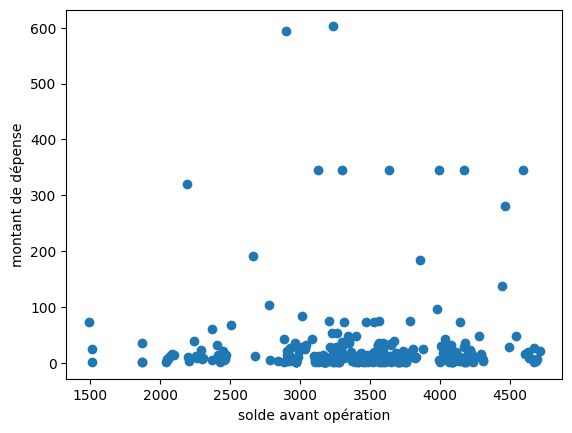

In [42]:
depenses = data[data.montant < 0]
plt.plot(depenses["solde_avt_ope"],-depenses["montant"],'o')
plt.xlabel("solde avant opération")
plt.ylabel("montant de dépense")
plt.show()

Ce diagramme n'est pas adapté.

## Alternative au diagramme de dispersion

il est possible d'agréger la variable X en abscisse (axe horizontal) en différentes classes. Cela équivaut à "découper" au couteau le graphique précédent en tranches verticales.<br>
On représente ensuite pour chaque tranche une boîte à moustaches calculée à partir de tous les points présents dans la tranche.

![Alt text](images/image-16.png)

Sur ce graphique, on ne peut pas vraiment dire que plus le solde est petit, plus le montant est petit, même si les boîtes à moustaches des tranches [2000;2500[ et [2500;3000[ semblent légèrement moins dispersées vers le haut.<br>
La boîte à moustaches la plus à gauche est très dispersée : cela peut sembler étonnant, mais elle n'est en fait pas très représentative car elle ne représente que 4 individus sur une population qui en contient presque 300.<br>
On remarque qu'il est donc important d'afficher les effectifs de chaque classe (n=4, n=14, n=19, etc.).

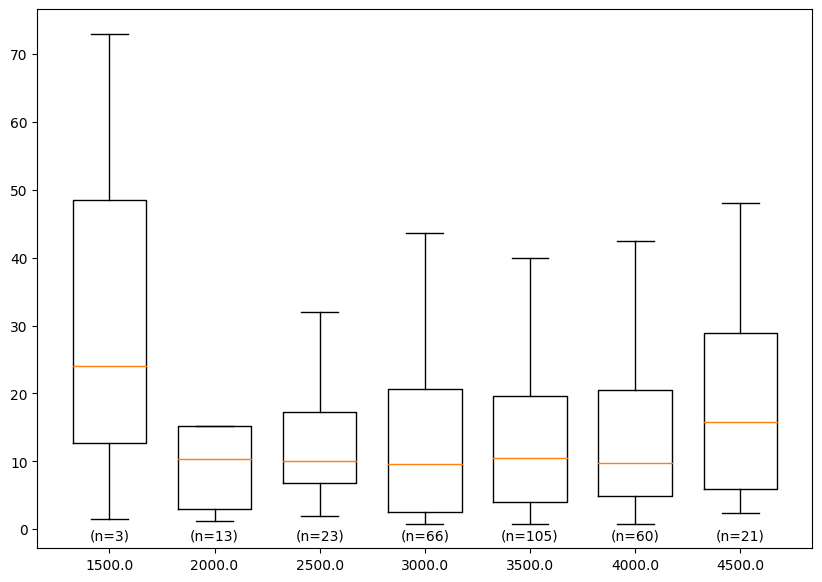

In [43]:
taille_classe = 500 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(depenses["solde_avt_ope"]), taille_classe)
tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(depenses["solde_avt_ope"], tranches) # associe chaque solde à son numéro de classe

for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants = -depenses.loc[indices==ind,"montant"] # sélection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

## Covariance empirique

![Alt text](images/image-17.png)

Si x est petit quand y est petit (et inversement), alors sX,Y sera positif.<br>
Si X et Y ne sont au contraire pas corrélés, sX,Y sera plutôt proche de 0.<br>
Si x est grand quand y est petit (et inversement), alors sX,Y sera négatif. Dans ce dernier cas, on dit que c'est une corrélation négative.

Voici deux propriétés de la covariance empirique :
- Symétrie
    - s(X,Y) = s(Y,X)
- Bilinéarité
    - Si on crée une nouvelle variable Z à partir de 2 variables U et V dont on connaît la covariance empirique, et que Z=aU+bV, alors s(X,Z)=as(X,U)+bs(X,V).

In [44]:
print(np.cov(depenses["solde_avt_ope"],-depenses["montant"],ddof=0)[1,0])

484.95954154532774


La méthode  np.cov  renvoie la matrice de covariance. Cette matrice est en fait un tableau, et dans ce dernier, c'est la valeur située sur la 2e ligne à la 1e colonne, d'où le  [1,0].

## Coefficient de corélation

![Alt text](images/image-18.png)

Ce coefficient r est appelé coefficient de corrélation, ou coefficient de corrélation linéaire, ou encore coefficient de corrélation de Pearson.

"linéaire" car il ne détecte les relations que lorsqu'elles sont linéaires, c'est-à-dire lorsque les points sont plutôt bien alignés sur une ligne droite.<br>
Sur les graphique ci-dessous :
- les deux premiers montrent des points bien alignés : leur r est donc proche de 1 ou de -1.
- Sur le 4e graphique en revanche, il n'y a pas vraiment de corrélation (connaître la valeur du x d'un point ne nous donne aucune indication sur la valeur de y ) : r est donc proche de 0.
- Cependant sur le 3e graphique, il y a une forte corrélation, mais sa forme n'est pas linéaire, et r est donc malheureusement proche de 0.

![Alt text](images/image-19.png)

In [45]:
print(st.pearsonr(depenses["solde_avt_ope"],-depenses["montant"])[0])

0.010068819133759194


Le coefficient de corrélation linéaire se calcule grâce à la méthode  st.pearsonr. On lui donne ensuite les 2 variables à étudier.<br>
Un couple de valeurs est renvoyé, le coefficient de corrélation est la premier élément de ce couple, d'où le  [0]  à la fin de la ligne 4.

# P4C4 - Analysez 2 variables quantitatives par régression linéaire

Nous allons étudier 2 variables : attente et montant.

La variable attente d’une opération donne le nombre de jours écoulés entre celle-ci et la précédente opération de catégorie COURSES.

En théorie, plus vous attendez pour aller faire les courses, plus vous aurez besoin d’acheter de provisions. On s’attend donc à ce que plus la valeur de attente est grande, plus la valeur du montant soit grande.

![image.png](images/image-20.png)

## Calcul de la variable "attente"

In [48]:
# Selection du sous-échantillon
courses = data.loc[data.categ == "COURSES", :]

# On trie les opérations par date
courses = courses.sort_values("date_operation")

# On ramène les montants en positif
courses["montant"] = -courses["montant"]

# calcul de la variable attente
r = []
last_date = dt.datetime.now()
for i,row in courses.iterrows():
    days = (row["date_operation"]-last_date).days
    if days == 0:
        r.append(r[-1])
    else:
        r.append(days)
    last_date = row["date_operation"]
courses["attente"] = r
courses = courses.iloc[1:,]

# on regroupe les opérations qui ont été effectués à la même date
# (courses réalisées le même jour mais dans 2 magasins différents)
a = courses.groupby("date_operation")["montant"].sum()
b = courses.groupby("date_operation")["attente"].first()
courses = pd.DataFrame({"montant":a, "attente":b})
courses.head()

,montant,attente
date_operation,,
2023-04-10,42.42,5
2023-04-25,32.67,15
2023-04-26,1.90,1
2023-04-28,9.11,2
2023-05-02,12.24,4


## Modélisation

Supposons :
- qu’à chaque fois que vous faites les courses, vous achetez 3 types de produits :
    - Les produits que vous consommerez avant la prochaine fois que vous irez faire les courses (produits alimentaires, d’hygiène, etc.).
    - Les produits qui ne seront pas consommés durant la durée de l’étude (la durée de l’étude étant la période entre votre 1er ticket de caisse enregistré dans l’échantillon et le dernier) : ce sont vos stocks de long terme (boîtes de conserves, produits surgelés, etc.).
    - Les produits qui ne sont pas des consommables (ex. : une fourchette, une serpillière, etc.), que vous n’achetez que très rarement.
- que vous consommez chaque jour des produits, et que le prix des produits que vous consommez en 1 jour est à peu près constant.

Appelons :
- a le prix moyen des produits consommés en un jour (ceux de type 1);
- b le prix moyen des produits de types 2 et 3 rassemblés, que vous achetez à chaque course;
- x le nombre de jours que vous avez attendu depuis vos dernières courses;
- y le montant du ticket de caisse.

Le prix de votre prochain ticket de caisse sera égal au nombre de jours d’attente multiplié par le prix moyen ce que vous consommez en 1 jour plus le prix moyen des produits de types 2 et 3:
- y=a.x+b

Il s'agit d'une équation d'une droite ce qui signifie que si je prends tous les x possibles compris entre (par exemple) 0 et 5, puis que je calcule tous leurs y  associés, avant de les placer sur un graphique avec les x  sur l'axe horizontal et les y  sur l'axe vertical, alors tous les points seront parfaitement alignés.

Essayons donc d'afficher le diagramme de dispersion avec X = attente et Y = montant, et regardons si tous les points sont alignés :

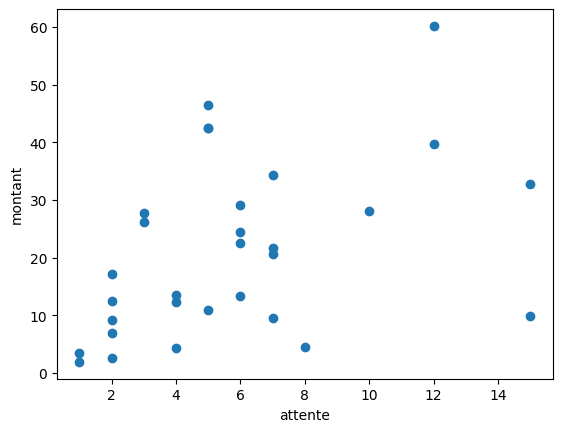

In [53]:
plt.plot(courses['attente'],courses['montant'], "o")
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

Les points ne sont pas alignés. Cela signifie que l'équation y=a.x+b n'est pas tout à fait exacte : elle est simpliste.
En écrivant cette équation, j’admets que je commettrai une certaine erreur entre la valeur que j'aurai prédite et la vraie valeur du prochain ticket.

Mais je peux intégrer cette erreur à l'équation, en l'appelant ϵ(epsilon) :

![image.png](images/image-21.png)

Ce modéle s'appelle la régression linéaire.

Pour calculer  a et b on cherche à minimiser l'erreur.
Graphiquement, voici comment on peut se représenter les choses. Si je fais varier a et b, alors je déplace la droite sur le graphique. Minimiser l'erreur revient en fait à placer la droite dans l'alignement général des points. Voici une illustration très pédagogique, car les points sont presque dans le même alignement :

![Alt text](images/image-22.png)

On y voit que pour un point i, on cherche à ce que la différence entre le yi (qui est la vraie valeur) et le y^i (qui est la valeur prédite par mon équation inexacte y^i=a.xi+b) soit minimale.

Il existe plusieurs manières de minimiser une erreur. La plus utilisée est celle qui minimise la somme des carrés de l'erreur yi−y^i. On l'appelle méthode des moindres carrés ordinaire (MCO).

## Estimation des coefficients a et b

Voici les formules qui permettent d'estimer a et b :

![Alt text](images/image-23.png)

le "^" signifie que c'est une estimation.
On considère que l'on ne peut pas avoir accès directement à vos comportements de consommation caractérisés par a et b, mais que l'on peut tout de même les estimer grâce à vos tickets de caisse. Ces estimations de a et de b sont notées a^ et b^.
Si on rajoute à l'échantillon un nouveau ticket de caisse, celui-ci fera varier un peu a^ et b^, même si votre comportement de consommation ne bouge pas (c'est-à-dire "même si a et b ne bougent pas").

In [55]:
Y = courses['montant']
X = courses[['attente']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['attente'],result.params['intercept']
print(a)
print(b)

1.7365779467680615
10.944847908745249


pourquoi les double crochets ligne 2 ?

Une régression linéaire prédit une variable en fonction d'une ou plusieurs variables.  sm.OLS  s'attend donc à trouver une unique colonne (c.-à-d. un  pd.Series  ) en premier argument (ici Y), mais s'attend à trouver potentiellement plusieurs colonnes en 2nd argument (ici X, qui est un  pd.DataFrame  ). Pour sélectionner plusieurs colonnes d'un dataframe, on passe une liste de noms de colonnes. Et comme une liste s'écrit entre crochets, ceux-ci viennent s'ajouter aux crochets déjà présents.

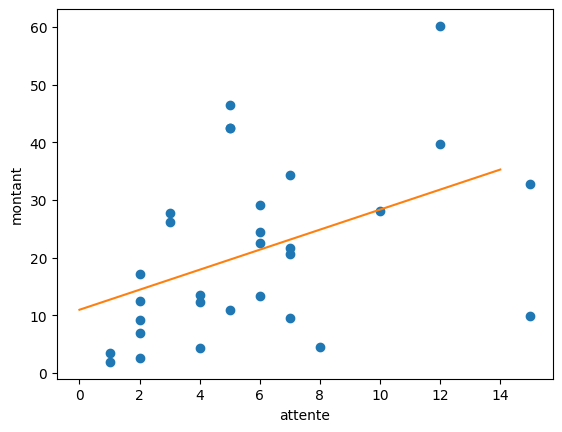

In [56]:
plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

## Analysez la qualité du modéle

Nous avons fait la supposition qu'il existait un lien linéaire entre attente et montant, c'est-à-dire un lien de type y=ax+b. Mais cette supposition est-elle réaliste ?

Après avoir appliqué un modèle, il faut toujours analyser sa qualité.

Imaginons que j'aie effacé par erreur le montant d'une opération bancaire de catégorie COURSES.

Je pourrais combler cette valeur manquante par la moyenne des montants des opérations. C'est la solution la plus basique qui soit, et elle n'est pas très bonne car autour de la moyenne, les valeurs des montants varient, parfois de beaucoup.

Je peux regarder la valeur de la variable attente de cette opération. Avec le modèle de régression linéaire que j'ai construit, je peux estimer la valeur du montant. Cette estimation sera meilleure que la précédente car nous avons cherché à minimiser l'erreur de modèle. Nous avons en fait cherché à minimiser les variations des valeurs de montant autour de la droite de régression.

Les variations autour de la moyenne sont donc plus grandes que les variations autour de la droite de régression.

Si on avait trouvé un modèle parfait, alors il n'y aurait plus d'erreur, et donc plus de variations entre les valeurs prédites et les valeurs réelles. Dans ce cas, on dirait que le modèle a réussi à expliquer la totalité des variations. Les variations autour de la moyenne sont mesurées par la variance.

Un modèle parfait aurait expliqué 100 % de la variation.

Ce pourcentage est calculé grâce à la formule de décomposition de la variance (analysis of variance, en anglais : ANOVA).

![Alt text](images/image-24.png)

SCT (somme des carrés totale) traduit la variation totale de Y.<br>
SCE (somme des carrés expliquée) traduit la variation expliquée par le modèle.<br>
SCR (somme des carrés résiduelle) traduit la variation inexpliquée par le modèle.

Pour la régression linéaire, le pourcentage de variation expliquée est donné par le coefficient de détermination noté R2 :

![Alt text](images/image-25.png)

R2 est en fait le carré du coefficient de corrélation linéaire. On a R2=r2X,Y.

## Critiquons ce résultat

En y regardant de plus près, on voit qu'il a 2 points qui "sortent du lot", on les appelle des outliers. En connaissant mes propres habitudes de consommation, je sais que je ne fais jamais les courses à plus de 15 jours d'intervalle. Ces deux points, pour lesquels attente = 15 jours, correspondent en fait à des retours de vacances (durant lesquelles je n'ai pas fait de courses). Comme je ne souhaite pas que ceux-ci interfèrent dans mon calcul, je les écarte.

Une fois écartés, j'obtiens ces nouvelles estimations :
- a^=3.03
- b^=5.41

attente      3.030823
intercept    5.411480
dtype: float64


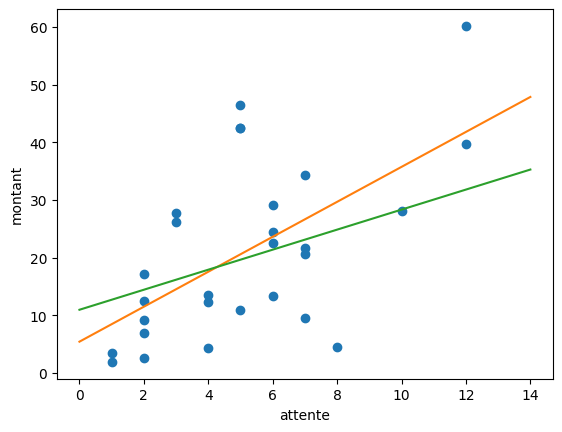

In [57]:
courses = courses.loc[courses['attente'] < 15, :]

Y = courses['montant']
X = courses[['attente']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a_new,b_new = result.params['attente'],result.params['intercept']

print(result.params)

plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a_new*x+b_new for x in np.arange(15)])
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

Ce résultat est bien différent du précédent. Avec seulement 2 individus écartés, les résultats changent beaucoup. On dit donc que le traitement statistique que nous venons d'appliquer (la régression linéaire avec estimation par la méthode des moindres carrés) est peu robuste aux outliers.

 C'est d'ailleurs le cas également du coefficient de corrélation linéaire rX,Y: il est peu robuste. En fait, ce n'est pas un hasard s'il l'est lui aussi. En effet, le coefficient de corrélation linéaire et la régression linéaire sont très liés .

# P4C5 - Analysez une variable quantitative et une qualitative par ANOVA

Le montant d'une opération est-il différent d'une catégorie de dépense à l'autre ? (montant et categ)

## Graphiques

In [60]:
X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data.loc[data["montant"] < 0, :].copy()
# On remet les dépenses en positif
sous_echantillon["montant"] = -sous_echantillon["montant"]
# On n'étudie pas les loyers car trop gros:
sous_echantillon = sous_echantillon.loc[sous_echantillon["categ"] != "LOYER", :]
sous_echantillon

,date_operation,libelle,montant,solde_avt_ope,categ,quart_mois
0,2023-03-31,DON XX XX XX XX XX XX XX,1.44,1515.25,AUTRE,4
1,2023-04-03,CARTE XX XX RAPT XX,24.00,1513.81,TRANSPORT,1
2,2023-04-03,CARTE XX XX RAPT XX,73.00,1489.81,TRANSPORT,1
5,2023-04-03,CARTE XX XX XX XX,14.39,2097.61,AUTRE,1
6,2023-04-05,CARTE XX XX XX XX XX,15.20,2083.22,AUTRE,1
...,...,...,...,...,...,...
303,2023-10-05,CARTE XX XX XX XX XX XX,10.64,2440.94,AUTRE,1
304,2023-10-05,CARTE XX XX XX XX,4.80,2430.30,AUTRE,1
305,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,1.92,2425.50,COTISATION BANCAIRE,1
306,2023-10-06,CARTE XX XX CHEZ LUC XX,10.00,2423.58,RESTAURANT,1


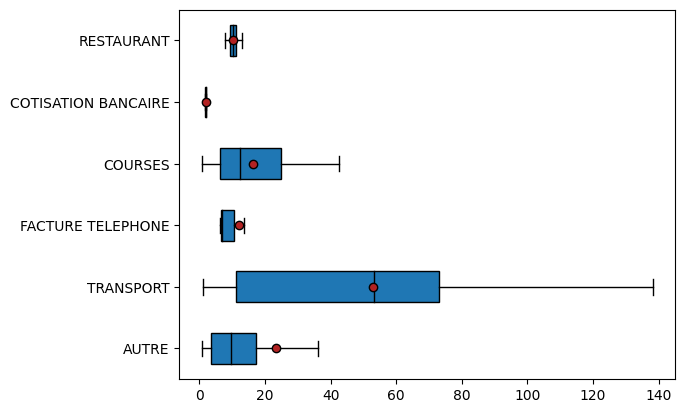

In [59]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

Les points rouges au milieu de chaque boîte à moustaches représentent la moyenne des valeurs.

On voit ici que les montants sont très différents d'une catégorie à l'autre.<br>
Par exemple, les montants des dépenses de transport sont plus élevés et plus dispersés que ceux des factures téléphoniques.

## Modélisation

On pourrait reprendre la formule de la régression linéaire, sauf qu'elle implique de multiplier X par a. Or cette fois-ci, X est qualitative, comme notre variable categ. Multiplier une variable qualitative par un nombre n'a aucun sens (ex. : "TRANSPORT" * 3 n'a aucun sens !).

Nous allons donc faire la supposition que vos opérations bancaires ont un montant de référence en commun appelé μ.<br>
Ensuite, on considère que le montant de l'opération s'ajuste en fonction de la catégorie i de dépense (loyer, transport, courses, etc.) :
- Si une catégorie a des montants qui sont en général inférieurs à μ, alors cet ajustement αi sera négatif;
- Dans le cas contraire, il sera positif.

On ajoute la contrainte que la somme de tous les αi soit égale à 0.

Comme pour le modèle de la régression linéaire, on aura ici aussi un terme d'erreur ϵ :

![Alt text](images/image-26.png)

Les calculs mathématiques qui nous disent quels sont les αi et μ qui minimisent l'erreur ϵ donnent des résultats très intuitifs :
- Le montant de référence μ est estimé par la moyenne de tous les montants. On appelle cette estimation μ^
- Pour une catégorie i, αi est estimé en calculant l'écart entre μ^ et la moyenne yi¯¯¯¯ des montants de la catégorie i, c'est-à-dire : αi^=yi¯¯¯¯−μ^

Ce modèle est très utilisé en statistiques inférentielles, et est appelé analyse de la variance, en anglais ANalysis Of VAriance (ANOVA).

## Évaluez le modéle

la formule utilisée est exactement la même que celle du chapitre précédent : SCT=SCE+SCR.<br>
Mais ici, comme la variable X est qualitative et les expressions de SCT, SCE et SCR introduisant les effectifs ni de chacune des classes i, qui sont au nombre de k, on peut donner à SCT, SCE et SCR les expressions équivalentes suivantes

![Alt text](images/image-27.png)

![Alt text](images/image-28.png)

![Alt text](images/image-29.png)

SCT est ici appelé variation totale (les anglophones utilisent plutôt Total Sum of Squares).<br>
SCE est ici appelé variation interclasse (Sum of Squares of the Model).<br>
SCR est ici appelé variation intraclasse (Sum of Squares of the Error) car s2i est la variance au sein de la classe i.<br>
(les classes sont les modalités de X)

De la même manière qu'on avait au chapitre précédent R2=SCE/SCT, l'équivalent ici s'appelle le rapport de corrélation, compris entre 0 et 1, donné par :

![Alt text](images/image-30.png)

Si  η2Y/X=0, cela signifie que les moyennes par classes sont toutes égales. Il n’y a donc pas à priori de relation entre les variables Y et X.<br>
Au contraire, si η2Y/X=1, cela signifie que les moyennes par classes sont très différentes, chacune des classes étant constituée de valeurs identiques : il existe donc à priori une relation entre les variables Y et X.

In [61]:
X = "categ" # qualitative
Y = "montant" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.0275228003018415

On obtient un résultat proche de 0.4, ce qui laisse penser qu'il y a effectivement une corrélation entre le montant des dépenses et leur catégorie.

## Corrélation en quart_mois et montant

Les dépenses que vous faites en début de mois sont-elles plus grosses qu'en fin de mois ? (montant et quart_mois).

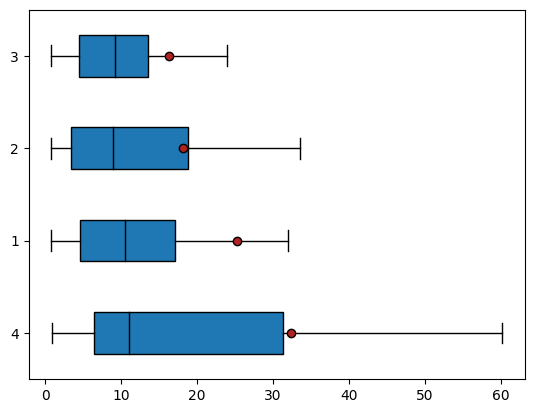

0.011398038009310869

In [62]:
X = "quart_mois" # qualitative
Y = "montant" # quantitative

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

eta_squared(sous_echantillon[X],sous_echantillon[Y])

# P4C6 - Analysez deux variables qualitatives avec le Chi-2

Y a-t-il des catégories d'opérations qui arrivent toujours au même moment du mois, comme votre loyer, par exemple ? (categ et quart_mois).

## Représentation

Tableau de contingence :

In [63]:
X = "quart_mois"
Y = "categ"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,AUTRE,COTISATION BANCAIRE,COURSES,FACTURE TELEPHONE,LOYER,RESTAURANT,TRANSPORT,Total
quart_mois,,,,,,,,
1,55.0,7.0,6.0,6.0,NaN,3.0,9.0,86
2,45.0,NaN,11.0,1.0,6.0,7.0,6.0,76
3,60.0,NaN,7.0,NaN,NaN,4.0,4.0,75
4,52.0,NaN,15.0,NaN,NaN,2.0,2.0,71
Total,212.0,7.0,39.0,7.0,6.0,16.0,21.0,308


## S'appuyer sur des statistiques

Si deux événements I et J sont indépendants, alors on s'attend à ce que le nombre d'individus qui satisfont à la fois I et J (appelons ce nombre nij) soit égal à fi×nj (c'est le calcul que vous aviez fait en entrant dans le bar : 30%*10=3). Au contraire, plus nij sera différent de fi×nj, plus on aura de raisons de penser que I et J ne sont pas indépendants.

Étudier une corrélation entre deux variables qualitatives revient donc à comparer les  nij avec les fi×nj. Les nij, ce sont les nombres qui sont dans le tableau de contingence (en dehors des 2 ligne et colonne TOTAL). On pourrait donc créer un autre tableau qui aurait la même forme que le tableau de contingence, mais qui contiendrait plutôt les fi×nj. Voici donc à gauche le tableau de contingence que nous avions, et à droite le tableau des fi×nj :

![Alt text](images/image-31.png)

Le tableau de droite est ce à quoi on s'attend en cas d'indépendance des 2 variables.<br>
Il faut donc une statistique qui puisse comparer les valeurs de ces 2 tableaux deux à deux, et qui permet aussi de trouver les cases pour lesquelles les valeurs sont très différentes.<br>
Ces cases seront des valeurs dignes d'intérêt, et qui seront source de non-indépendance des 2 variables.

La formule est la suivante :

![Alt text](images/image-32.png)

Cette mesure est calculable pour chacune des cases du tableau de contingence.

Il peut être intéressant de colorer ce dernier en fonction de cette mesure :
- foncé quand la mesure est grande;
- clair quand elle est proche de 0.

Ainsi, on détecte facilement les cases qui sont source de non-indépendance : cette représentation s'appelle une carte de chaleur, ou heatmap, en anglais.

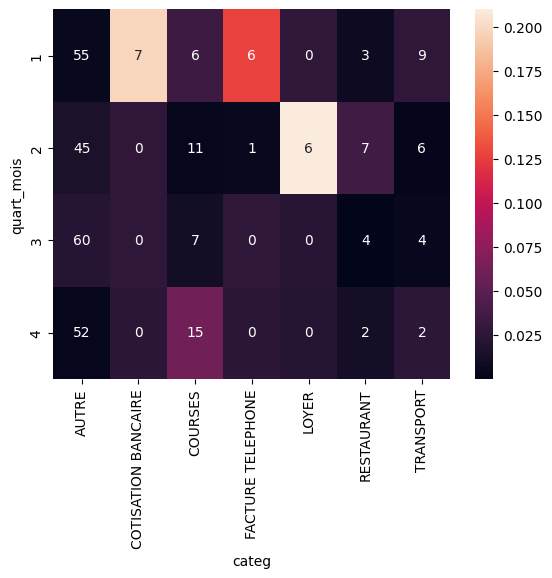

In [64]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

On obtient ainsi pour chaque case une valeur comprise entre 0 et 1.

On peut considérer cette valeur comme une contribution à la non-indépendance. Elle est optionnellement exprimable en pourcentage si on la multiplie par 100. Plus cette contribution sera proche de 100 %, plus la case en question sera source de non-indépendance. La somme de toutes les contributions vaut 100 %.

En regardant ces cases foncées, on apprend que les cotisations bancaires et factures téléphoniques sont souvent payées en tout début de mois, que les loyers sont souvent payés en 2e quartier de mois, etc.

Enfin, si on somme toutes ces mesures ξij pour chaque case du tableau (de la colonne j=1 à la colonne j=l, puis de la ligne i=1 à la ligne i=k), on obtient la statistique ξn :

![Alt text](images/image-33.png)

Normalement, on applique à cette mesure un seuil au-delà duquel on dira que les 2 variables sont corrélées. Retenons juste ici que plus ξn est grand, moins l'hypothèse d'indépendance est valide.

Le test avec le seuil s'appelle le test du χ2 d'indépendance, parfois écrit chi-2 ou khi-2.

Nous avons vu les mesures r2, η2 et ξn. Ce sont tous des nombres qui nous donnent une indication sur la corrélation (ou au contraire sur l'indépendance) de deux variables.

Mais quand vous avez un r2 ou un η2 égal à 0.4 (ce qui n'est proche ni de 0 ni de 1), peut-être avez-vous ressenti la frustration de dire "Bon oui certes, c'est un peu corrélé, mais pas trop non plus...". N'écrivez jamais cette phrase dans un rapport d'analyse de données ! Pour remédier à cela, il existe des tests statistiques.

En fait, il existe des seuils que l'on peut calculer. En dessous du seuil, on dira "Les variables ne sont pas corrélées", et au-dessus, on dira l'inverse.

C'est bien plus pratique ! Mais pour être tout à fait précis, il faut donner une précision supplémentaire, qui est une sorte de "niveau de certitude", que l'on appelle seuil de significativité. On utilise pour cela la p-value, exprimée en pourcentage.

C'est grâce à elle que l'on peut dire si un test statistique est significatif ou pas.